In [1]:
library(ISLR)

# Fitting Classification Trees


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

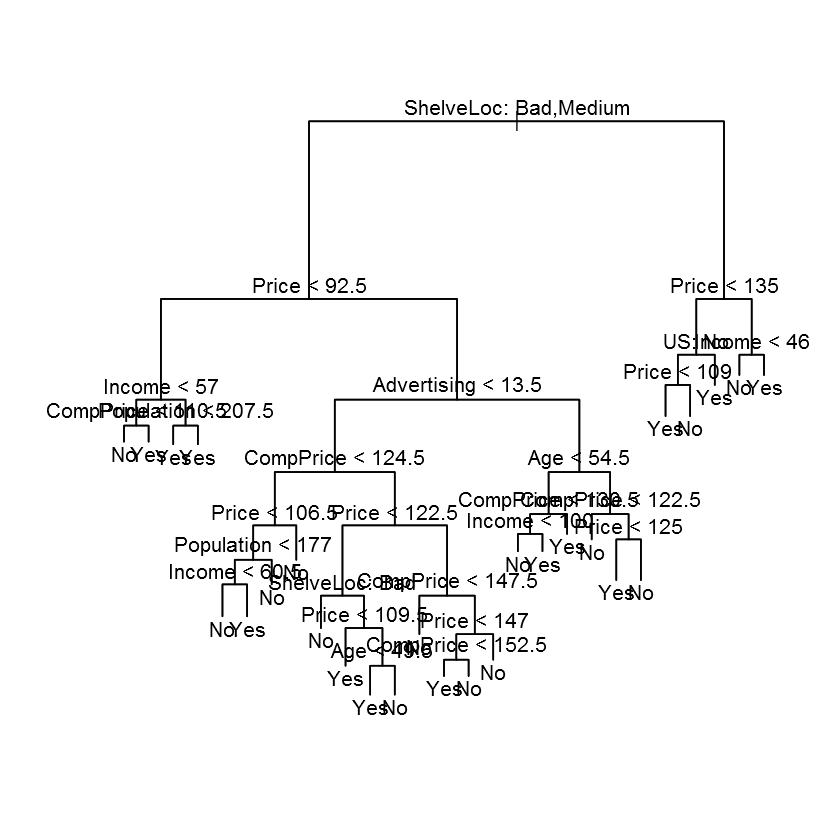

In [2]:
library(tree)
High=ifelse(Carseats$Sales<=8,"No","Yes")
Carseats=data.frame(Carseats,High)
tree.carseats=tree(High~.-Sales,Carseats)

summary(tree.carseats)
#tree.carseats

plot(tree.carseats)
text(tree.carseats,pretty=0)

In [4]:
# Train and test
set.seed(2)
train=sample(1:nrow(Carseats), 200)
Carseats.test=Carseats[-train,]
High.test=High[-train]

tree.carseats=tree(High~.-Sales,Carseats,subset=train)
tree.pred=predict(tree.carseats,Carseats.test,type="class")

table(tree.pred,High.test)

         High.test
tree.pred No Yes
      No  86  27
      Yes 30  57

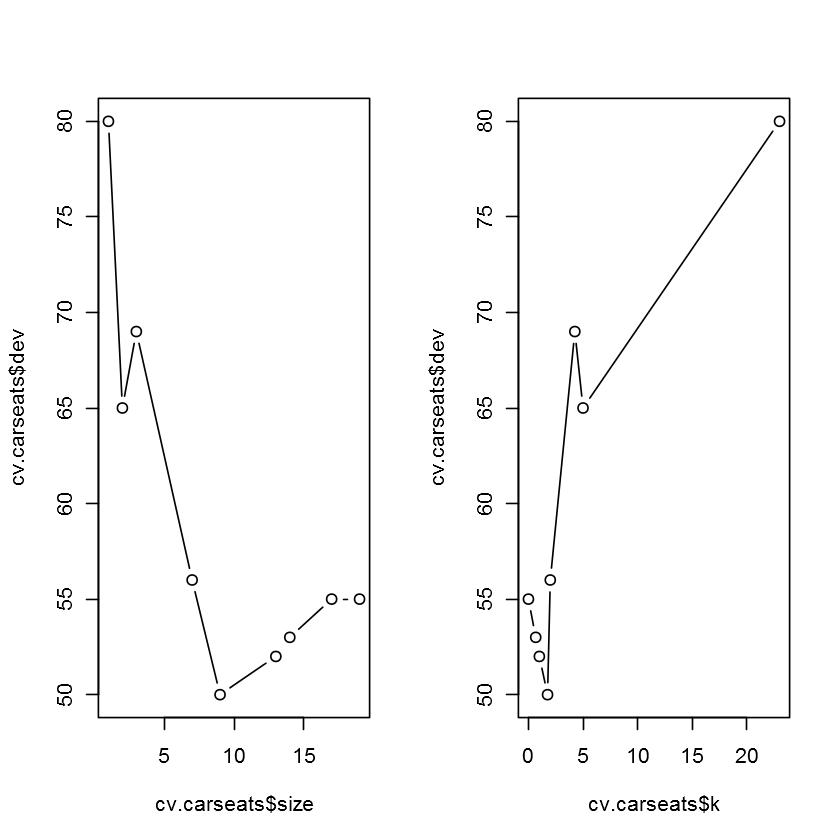

In [8]:
set.seed(3)
cv.carseats=cv.tree(tree.carseats,FUN=prune.misclass)

# Report the size of the tree limited by k (alpha in the book)
par(mfrow=c(1,2))
plot(cv.carseats$size,cv.carseats$dev,type="b")
plot(cv.carseats$k,cv.carseats$dev,type="b")


Classification tree:
snip.tree(tree = tree.carseats, nodes = c(159L, 6L, 8L, 38L))
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Advertising" "Age"         "CompPrice"  
Number of terminal nodes:  9 
Residual mean deviance:  0.8103 = 154.8 / 191 
Misclassification error rate: 0.155 = 31 / 200 

         High.test
tree.pred No Yes
      No  94  24
      Yes 22  60

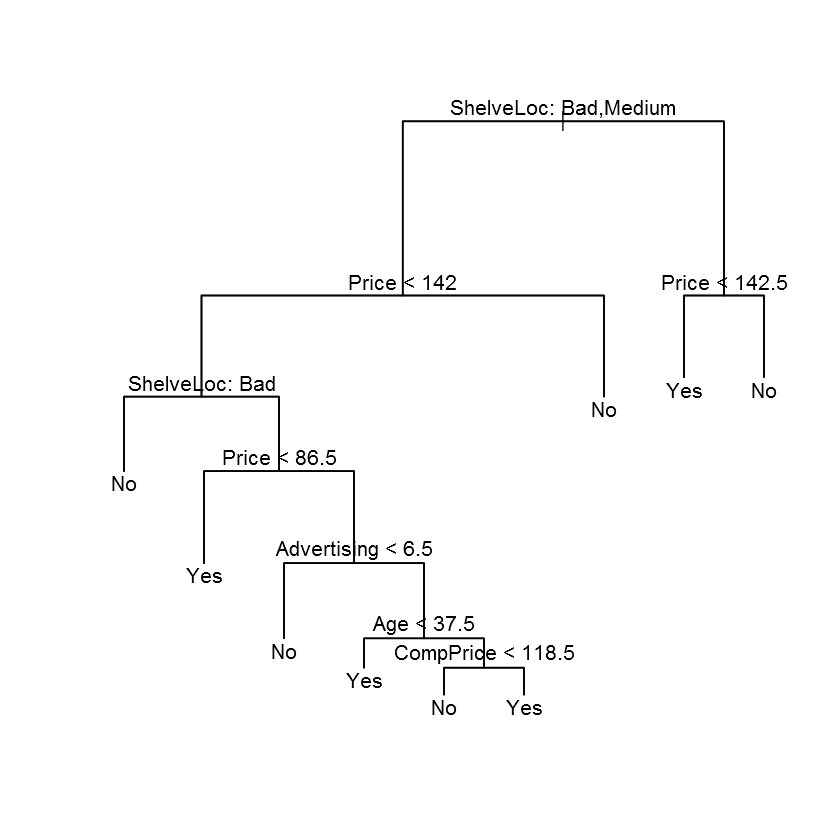

In [39]:
prune.carseats=prune.misclass(tree.carseats,best=9)
plot(prune.carseats)
text(prune.carseats,pretty=0)

summary(prune.carseats)

tree.pred=predict(prune.carseats,Carseats.test,type="class")
table(tree.pred,High.test)

# Fitting Regression Trees


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"  
Number of terminal nodes:  8 
Residual mean deviance:  12.65 = 3099 / 245 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-14.10000  -2.04200  -0.05357   0.00000   1.96000  12.60000 

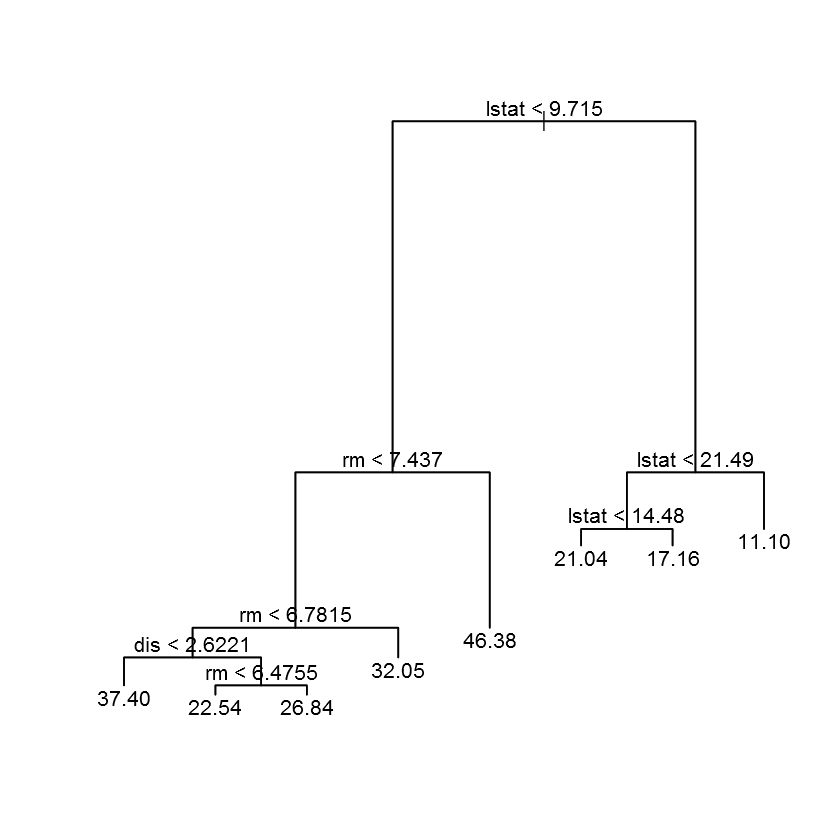

In [15]:
library(MASS)
set.seed(1)
train = sample(1:nrow(Boston), nrow(Boston)/2)
tree.boston=tree(medv~.,Boston,subset=train)

summary(tree.boston)
plot(tree.boston)
text(tree.boston,pretty=0)
# Note: the tree uses only three predictors

[1] 25.04559

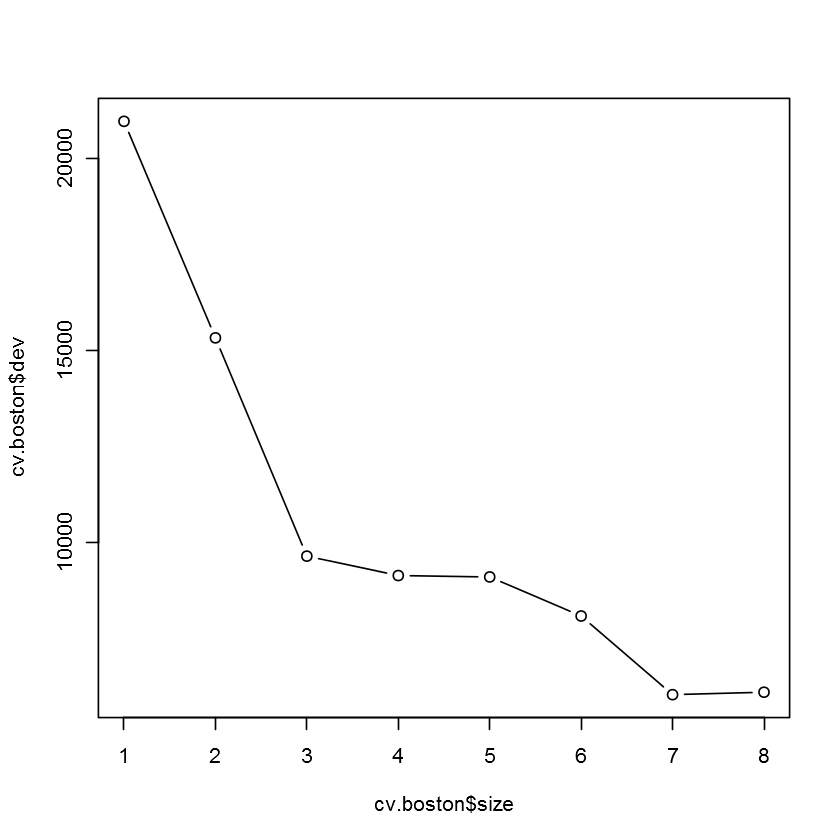

In [17]:
# Will pruning the tree increase performance?
cv.boston=cv.tree(tree.boston)
plot(cv.boston$size,cv.boston$dev,type='b')

# The most complex tree is the best. But you can prune tree with:
#prune.boston=prune.tree(tree.boston,best=5)
#plot(prune.boston)
#text(prune.boston,pretty=0)

# Performance
yhat=predict(tree.boston,newdata=Boston[-train,])
boston.test=Boston[-train,"medv"]
#plot(yhat,boston.test)
#abline(0,1)
mean((yhat-boston.test)^2)

# Bagging and Random Forests


Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.02509
                    % Var explained: 86.65

[1] 13.47349

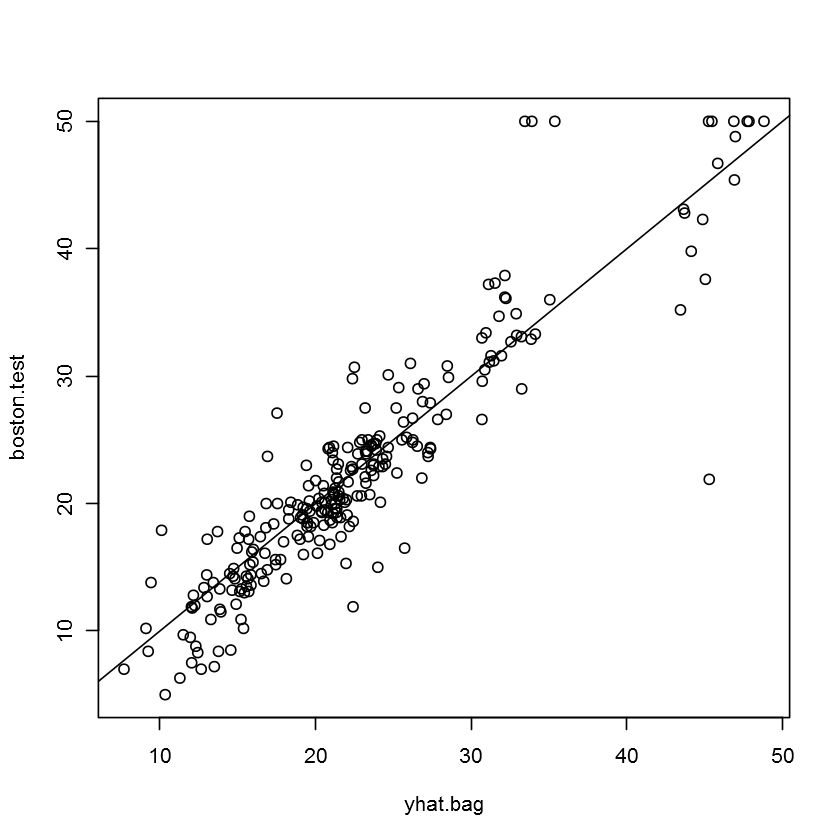

In [23]:
# Recall that bagging is simply a special case of a random forest with m = p
library(randomForest)
set.seed(1)
bag.boston=randomForest(medv~.,data=Boston,subset=train,mtry=13,importance=TRUE)
bag.boston

yhat.bag = predict(bag.boston,newdata=Boston[-train,])
plot(yhat.bag, boston.test)
abline(0,1)
mean((yhat.bag-boston.test)^2)

[1] 11.48022

,%IncMSE,IncNodePurity
crim,12.547772,1094.65382
zn,1.375489,64.40060
indus,9.304258,1086.09103
chas,2.518766,76.36804
nox,12.835614,1008.73703
rm,31.646147,6705.02638
age,9.970243,575.13702
dis,12.774430,1351.01978
rad,3.911852,93.78200
tax,7.624043,453.19472


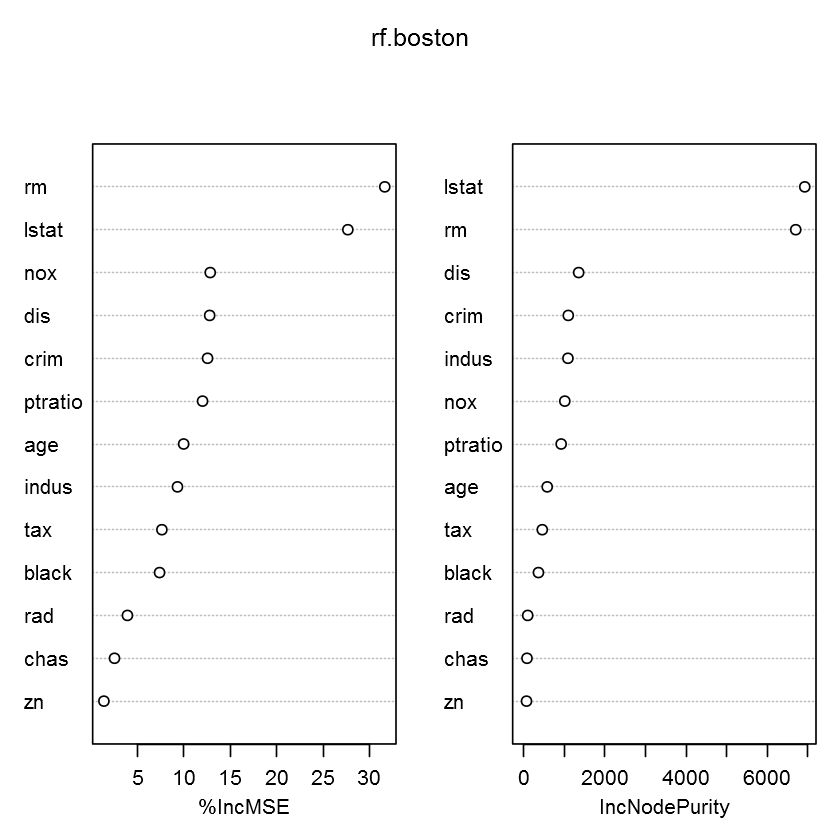

In [24]:
# By default, randomForest() uses p/3 variables when building a random forest of regression trees, and
# sqrt(p) variables when building a random forest of classification trees.
set.seed(1)
rf.boston=randomForest(medv~.,data=Boston,subset=train,mtry=6,importance=TRUE)
yhat.rf = predict(rf.boston,newdata=Boston[-train,])
mean((yhat.rf-boston.test)^2)
importance(rf.boston)
varImpPlot(rf.boston)

# The results indicate that across all of the trees considered in the random
# forest, the wealth level of the community (lstat) and the house size (rm)
# are by far the two most important variables

# Boosting

,var,rel.inf
lstat,lstat,45.9627334
rm,rm,31.2238187
dis,dis,6.8087398
crim,crim,4.0743784
nox,nox,2.5605001
ptratio,ptratio,2.2748652
black,black,1.7971159
age,age,1.6488532
tax,tax,1.3595005
indus,indus,1.2705924


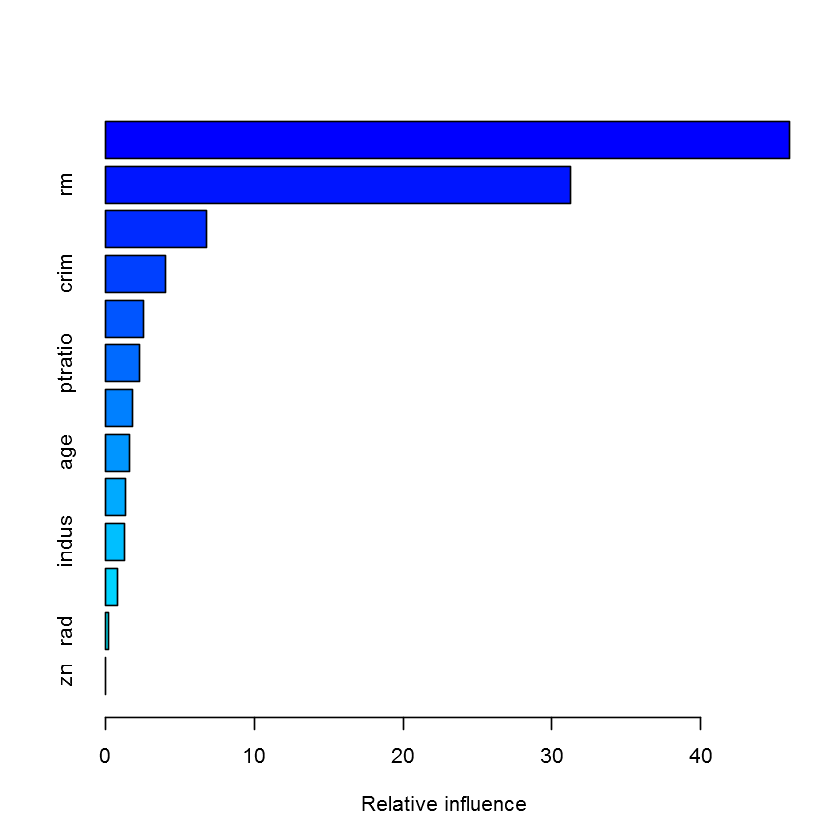

In [30]:
library(gbm)
set.seed(1)
# For a binary classification problem, we would use distribution="bernoulli"
boost.boston=gbm(medv~.,data=Boston[train,],distribution="gaussian",
                 n.trees=5000,interaction.depth=4)
summary(boost.boston)

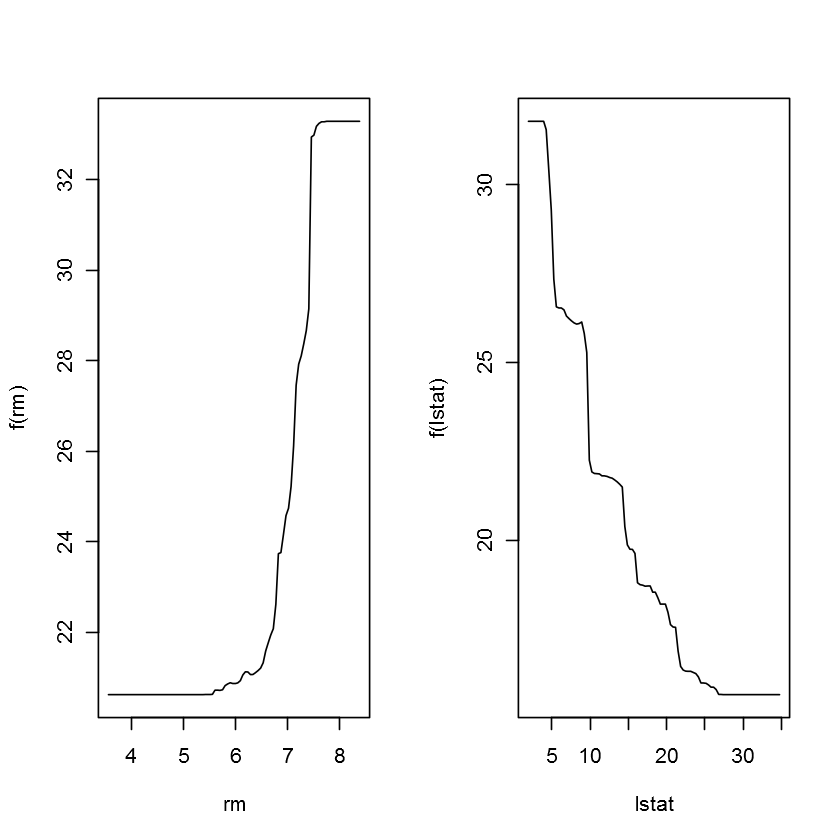

In [31]:
# rm and lstat are the most important variables
par(mfrow=c(1,2))
plot(boost.boston,i="rm")
plot(boost.boston,i="lstat")

In [33]:
yhat.boost=predict(boost.boston,newdata=Boston[-train,],n.trees=5000)
mean((yhat.boost-boston.test)^2)

# More parameters / Optimization
# Shrinkage is the coefficient for lambda
boost.boston=gbm(medv~.,data=Boston[train,],distribution="gaussian",
                 n.trees=5000,interaction.depth=4,shrinkage=0.2,verbose=F)
yhat.boost=predict(boost.boston,newdata=Boston[-train,],n.trees=5000)
mean((yhat.boost-boston.test)^2)

[1] 11.51109

[1] 10.89474

# Examples

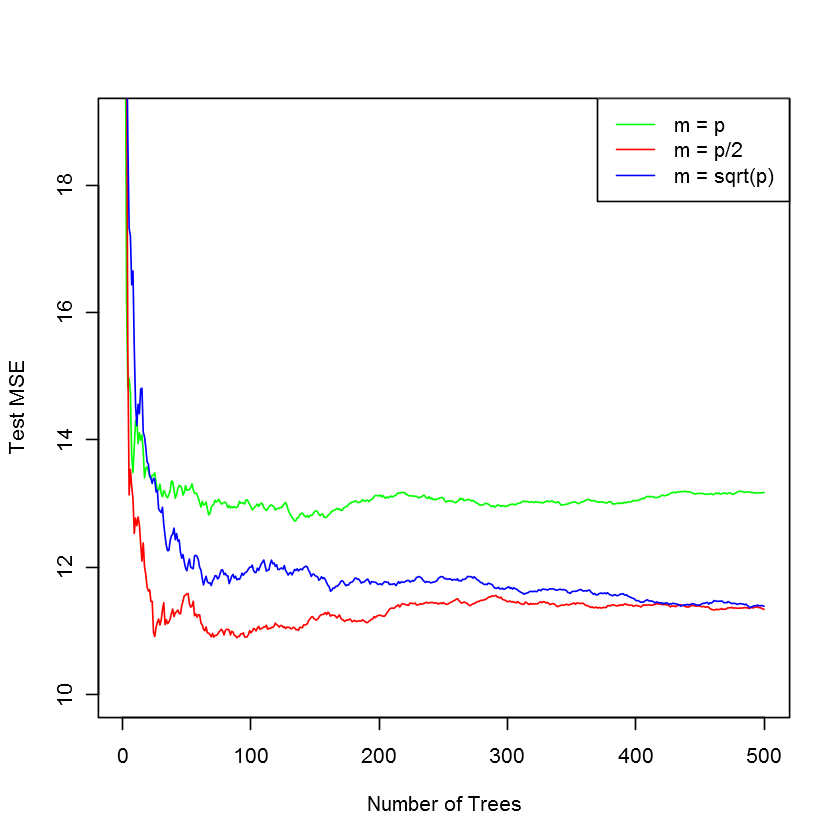

In [35]:
set.seed(1)
train <- sample(1:nrow(Boston), nrow(Boston) / 2)
Boston.train <- Boston[train, -14]
Boston.test <- Boston[-train, -14]
Y.train <- Boston[train, 14]
Y.test <- Boston[-train, 14]

rf.boston1 <- randomForest(Boston.train, y = Y.train, xtest = Boston.test, 
                           ytest = Y.test, mtry = ncol(Boston) - 1, ntree = 500)
rf.boston2 <- randomForest(Boston.train, y = Y.train, xtest = Boston.test, 
                           ytest = Y.test, mtry = (ncol(Boston) - 1) / 2, ntree = 500)
rf.boston3 <- randomForest(Boston.train, y = Y.train, xtest = Boston.test, 
                           ytest = Y.test, mtry = sqrt(ncol(Boston) - 1), ntree = 500)

plot(1:500, rf.boston1$test$mse, col = "green", type = "l", xlab = "Number of Trees", ylab = "Test MSE", ylim = c(10, 19))
lines(1:500, rf.boston2$test$mse, col = "red", type = "l")
lines(1:500, rf.boston3$test$mse, col = "blue", type = "l")
legend("topright", c("m = p", "m = p/2", "m = sqrt(p)"), col = c("green", "red", "blue"), cex = 1, lty = 1)